# Stock Forecasting using PyFlux

### Beta-t-EGARCH in-mean models

https://github.com/RJT1990/pyflux

In [1]:
# Data manipulation
# ==============================================================================
import pandas as pd
import numpy as np
import datetime

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Modelling and Forecasting
# ==============================================================================
import pyflux as pf

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

# Yahoo finance is used to fetch data 
# ==============================================================================
import yfinance as yf
yf.pdr_override()

In [2]:
symbol = '^GSPC' # input
start = '2020-01-01' # input 
end = '2022-07-18'  # input
df = yf.download(symbol, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3458250000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3720890000


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-11,3880.939941,3880.939941,3847.219971,3854.429932,3854.429932,3023830000
2022-07-12,3851.949951,3873.409912,3802.360107,3818.800049,3818.800049,0
2022-07-13,3779.669922,3829.439941,3759.070068,3801.780029,3801.780029,3166580000
2022-07-14,3763.989990,3796.409912,3721.560059,3790.379883,3790.379883,3447500000
2022-07-15,3818.000000,3863.620117,3817.179932,3863.159912,3863.159912,3537130000


In [5]:
log_returns = pd.DataFrame(np.diff(np.log(df['Adj Close'].values)))
log_returns.index = df.index.values[1:df.index.values.shape[0]]
log_returns.columns = [symbol + " Returns"]

log_returns.head()

,^GSPC Returns
2020-01-03,-0.007085
2020-01-06,0.003527
2020-01-07,-0.002807
2020-01-08,0.004890
2020-01-09,0.006633


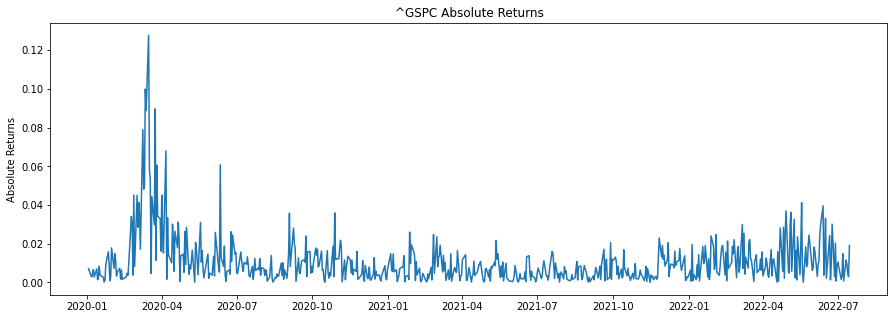

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(np.abs(log_returns))
plt.ylabel("Absolute Returns")
plt.title(symbol + " Absolute Returns")
plt.show()

In [7]:
model = pf.EGARCHM(log_returns,p=1,q=1)
x = model.fit('BBVI', record_elbo=True, iterations=1000, map_start=False)
x.summary()

10% done : ELBO is 1815.2239989481395, p(y,z) is 1828.830522149855, q(z) is 13.606523201715433
20% done : ELBO is 1890.7027669662518, p(y,z) is 1904.6935470301821, q(z) is 13.99078006393027
30% done : ELBO is 1905.586675223457, p(y,z) is 1919.8326909368402, q(z) is 14.246015713383185
40% done : ELBO is 1900.9812257556423, p(y,z) is 1915.3658678738493, q(z) is 14.384642118206944
50% done : ELBO is 1903.1941552854184, p(y,z) is 1917.6469504803931, q(z) is 14.452795194974723
60% done : ELBO is 1910.8602183986604, p(y,z) is 1925.4037858353604, q(z) is 14.543567436699906
70% done : ELBO is 1895.0372453466912, p(y,z) is 1909.6437176951556, q(z) is 14.60647234846433
80% done : ELBO is 1913.93765184619, p(y,z) is 1928.6027534738025, q(z) is 14.6651016276126
90% done : ELBO is 1914.357777739862, p(y,z) is 1929.086094963737, q(z) is 14.728317223874873
100% done : ELBO is 1915.127425209278, p(y,z) is 1929.9344788829753, q(z) is 14.807053673697203

Final model ELBO is 1915.511152936287
EGARCHM(1,1

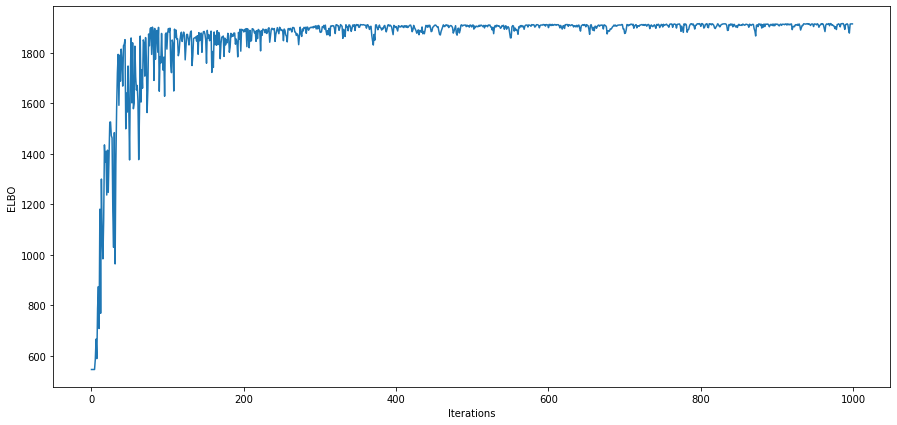

In [8]:
x.plot_elbo(figsize=(15,7))

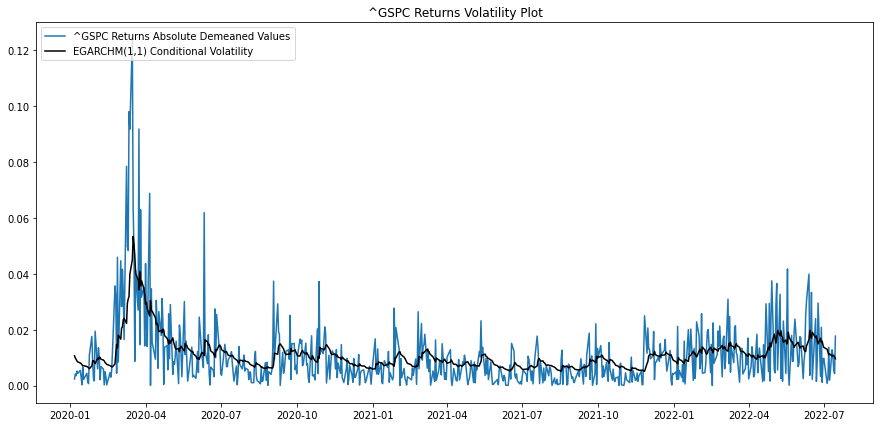

In [9]:
model.plot_fit(figsize=(15,7))

In [10]:
model.predict(h=10)

,^GSPC Returns
2022-07-11,0.010927
2022-07-15,0.010895
2022-07-16,0.010869
2022-07-17,0.010825
2022-07-18,0.010800
2022-07-21,0.010774
2022-07-22,0.010752
2022-07-23,0.010729
2022-07-24,0.010704
2022-07-25,0.010668


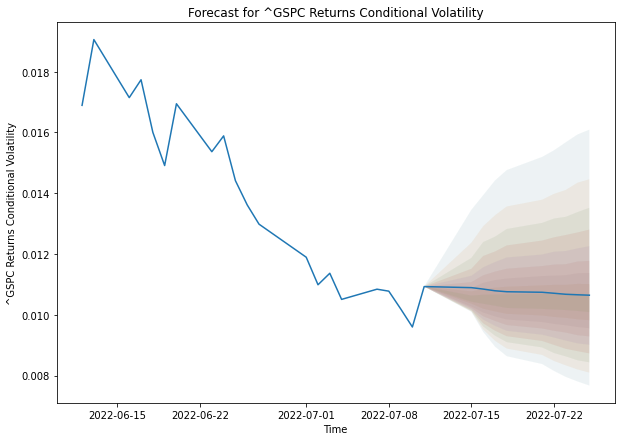

In [11]:
model.plot_predict(h=10)

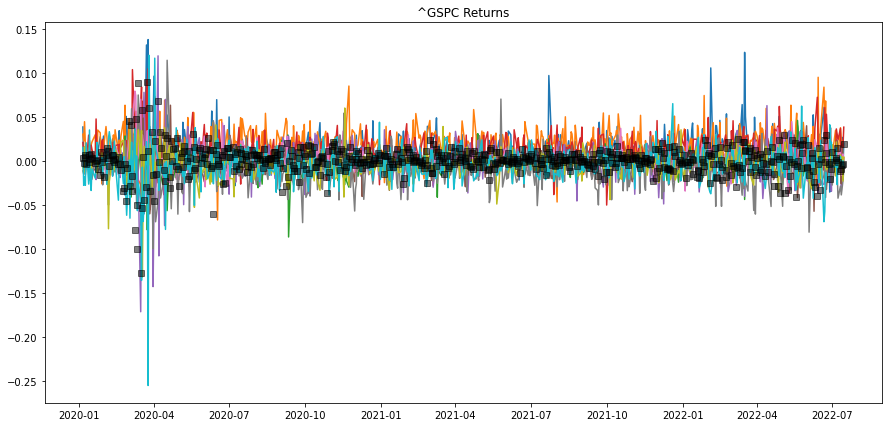

In [12]:
model.plot_sample(figsize=(15, 7))

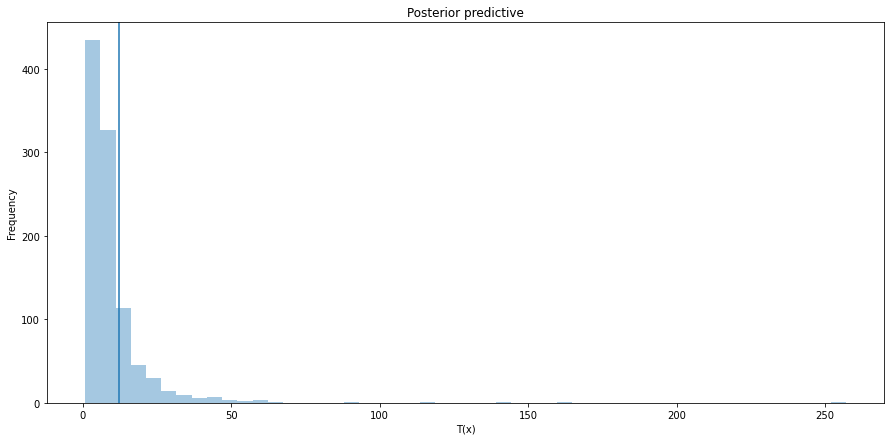

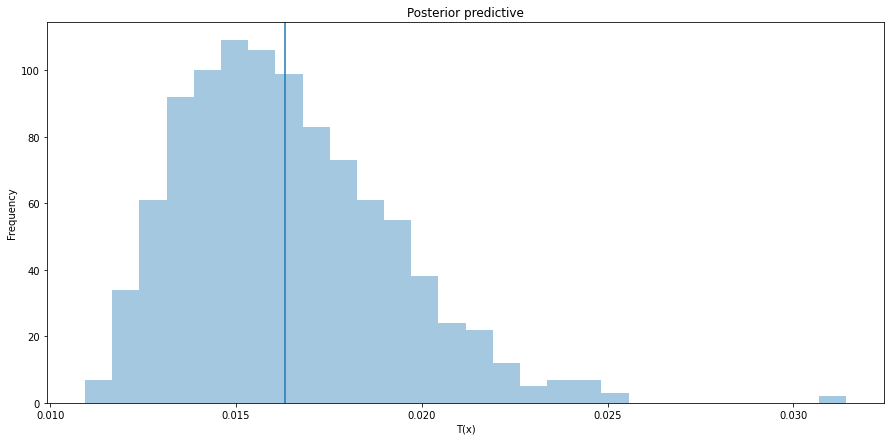

In [13]:
from scipy.stats import kurtosis
model.plot_ppc(T=kurtosis,figsize=(15, 7))
model.plot_ppc(T=np.std,figsize=(15, 7))